<center><img src="https://guarulhosweb.com.br/wp-content/uploads/2022/03/univesp-1536x905.jpg" width="450"/></center>

# 1. Introdução ao GeoPandas

![Divisão do GeoPandas](imagens/geopandas_separacao_expandido.png)

A biblioteca `geopandas` é uma extensão da biblioteca `pandas` criada para facilitar a manipulação de dados georreferenciados.

__Mas o que são dados georreferenciados?__

Também conhecidos como dados espaciais, geográficos ou geoespaciais, são dados que possuem as informações para localizar objetos ou entidades na superfície da Terra. Essas informações são representadas principalmente pelos dados de __latitude__ e __longitude__.

__Por que eu devo aprender?__

Cientistas de dados lidam com problemas distintos e precisam manipular diferentes tipos de dados, como imagens, áudio e texto. Com a popularização dos dispositivos móveis, como o smartphone, os dados da sua localização são compartilhados a todo momento com diversos aplicativos, e estes aplicativos usam essas informações para fornecer uma serviços de acordo com a sua localização.

__Exemplos de aplicativos que trabalham com dados georreferenciados:__
- Google
- Waze
- iFood
- Uber
- Facebook
- Twitter

**`Dica:`** documentação da biblioteca *geopandas*: https://geopandas.org/

**`Dica:`** documentação da biblioteca *matplotlib*: https://matplotlib.org/users/index.html

# 2. Instalando bibliotecas

In [1]:
# instalando a biblioteca geopandas com conda
#!conda install geopandas -y

# instalando a biblioteca geopandas com pip
#!pip install geopandas
#!pip install rtree

In [2]:
# mostrar a versão da biblioteca
#!conda list geopandas

In [3]:
# instalando a biblioteca matplotlib com conda
#!conda install matplotlib -y

# instalando a biblioteca matplotlib com pip
#!pip install matplotlib

In [4]:
# mostrar a versão da biblioteca
#!conda list matplotlib

In [5]:
# importar as bibliotecas
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import rtree

# 3. Baixando dados espaciais

Baixar os dados dos municípios da cidade de São Paulo.

Você pode encontrar um catálogo de dados por estado no site do IBGE: https://www.ibge.gov.br/geociencias/organizacao-do-territorio/15774-malhas.html?=&t=downloads

Você pode baixar os dados [aqui](https://geoftp.ibge.gov.br/organizacao_do_territorio/malhas_territoriais/malhas_municipais/municipio_2019/UFs/SP/sp_municipios.zip) 

Baixe os dados e descompacte na pasta "datasets". Na pasta, vamos ter um conjunto de arquivos com o nome "SP_Municipios_2019".

Utilize a biblioteca geopandas, baixe o shapefile do Brasil ou do estado em questão pode ser aqui 
http://www.usp.br/nereus/?dados=unidades-federativas
em seguida abra o arquivo .shp

# 4. Lendo arquivos

Tipicamente o primeiro passo para fazer uma análise em python consiste em carregar os dados. Para arquivos espaciais existem vários padrões de arquivos diferentes, entre os mais utilizados, estão: [Shapefile](https://en.wikipedia.org/wiki/Shapefile), [GeoJSON](https://en.wikipedia.org/wiki/GeoJSON), [KML](https://en.wikipedia.org/wiki/Keyhole_Markup_Language) e [GPKG](https://en.wikipedia.org/wiki/GeoPackage).

Com o [Geopandas](http://geopandas.org/io.html) podemos ler todos estes formatos e muitos outros. Ler dados espaciais pode ser feito facilmente com o geopandas usando a função `gpd.read_file()`.

In [6]:
# lendo os dados com o geopandas
estado = gpd.read_file('datasets/SP_Municipios_2021.shp')
# Lendo dados gravimetria
df = pd.read_excel("datasets/gravimetria_rsu_usina_sjb.xlsx")
# Lendo regiao cmm
cmm = gpd.read_file('datasets/mapa_cmm.shp')

In [7]:
estado.crs

<Geographic 2D CRS: EPSG:4674>
Name: SIRGAS 2000
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: Latin America - Central America and South America - onshore and offshore. Brazil - onshore and offshore.
- bounds: (-122.19, -59.87, -25.28, 32.72)
Datum: Sistema de Referencia Geocentrico para las AmericaS 2000
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [8]:
cmm.crs

<Geographic 2D CRS: EPSG:4674>
Name: SIRGAS 2000
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: Latin America - Central America and South America - onshore and offshore. Brazil - onshore and offshore.
- bounds: (-122.19, -59.87, -25.28, 32.72)
Datum: Sistema de Referencia Geocentrico para las AmericaS 2000
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [9]:
estado.head()

,CD_MUN,NM_MUN,SIGLA,AREA_KM2,geometry
0,3500105,Adamantina,SP,411.987,"POLYGON ((-51.05425 -21.40465, -51.05300 -21.4..."
1,3500204,Adolfo,SP,211.055,"POLYGON ((-49.65795 -21.20333, -49.65645 -21.2..."
2,3500303,Aguaí,SP,474.554,"POLYGON ((-46.97640 -21.96818, -46.97599 -21.9..."
3,3500402,Águas da Prata,SP,142.673,"POLYGON ((-46.73501 -21.81891, -46.73431 -21.8..."
4,3500501,Águas de Lindóia,SP,60.126,"POLYGON ((-46.60614 -22.44173, -46.60347 -22.4..."


In [10]:
estado.dtypes

CD_MUN        object
NM_MUN        object
SIGLA         object
AREA_KM2     float64
geometry    geometry
dtype: object

In [11]:
cmm.head(7)

,CD_MUN,NM_MUN,SIGLA,AREA_KM2,geometry
0,3517703,Guará,SP,362.183,"POLYGON ((-47.87315 -20.38765, -47.87171 -20.3..."
1,3521309,Ipuã,SP,466.461,"POLYGON ((-48.14881 -20.29091, -48.14719 -20.2..."
2,3536307,Patrocínio Paulista,SP,602.848,"POLYGON ((-47.23576 -20.53382, -47.23501 -20.5..."
3,3543105,Ribeirão Corrente,SP,148.332,"POLYGON ((-47.55318 -20.38656, -47.55283 -20.3..."
4,3544905,Sales Oliveira,SP,305.776,"POLYGON ((-47.81655 -20.73963, -47.81595 -20.7..."
5,3549409,São Joaquim da Barra,SP,410.863,"POLYGON ((-47.90740 -20.43384, -47.90643 -20.4..."
6,3549508,São José da Bela Vista,SP,276.952,"POLYGON ((-47.61222 -20.48198, -47.60908 -20.4..."


In [12]:
cmm.dtypes

CD_MUN        object
NM_MUN        object
SIGLA         object
AREA_KM2     float64
geometry    geometry
dtype: object

Agora que o arquivo shapefile foi lido na variável `data`, vamos ver o seu formato:

Podemos ver que o tipo da variável é um `GeoDataFrame`. O objeto GeoDataFrame herda as funcionalidades do `pandas.DataFrame` adicionando operações sobre dados espaciais, usando abordagens semelhantes as estruturas de dados do Pandas (por isso o nome Geopandas). O `GeoDataFrame` possui algumas características especiais e funções internas que facilitam análises de estruturas geométricas.

Vamos dar uma olhada nos nossos dados, mostrando as cinco primeiras linhas com a função `head()`.

# 5. Filtrando apenas os municípios do CMM (Consórcio dos Municípios da Mogiana)

In [13]:
data_plot = estado[estado['CD_MUN'].isin(['3517703','3521309','3536307','3543105','3544905','3549409','3549508'])]
data_plot

,CD_MUN,NM_MUN,SIGLA,AREA_KM2,geometry
201,3517703,Guará,SP,362.183,"POLYGON ((-47.87315 -20.38765, -47.87171 -20.3..."
244,3521309,Ipuã,SP,466.461,"POLYGON ((-48.14881 -20.29091, -48.14719 -20.2..."
408,3536307,Patrocínio Paulista,SP,602.848,"POLYGON ((-47.23576 -20.53382, -47.23501 -20.5..."
482,3543105,Ribeirão Corrente,SP,148.332,"POLYGON ((-47.55318 -20.38656, -47.55283 -20.3..."
503,3544905,Sales Oliveira,SP,305.776,"POLYGON ((-47.81655 -20.73963, -47.81595 -20.7..."
552,3549409,São Joaquim da Barra,SP,410.863,"POLYGON ((-47.90740 -20.43384, -47.90643 -20.4..."
553,3549508,São José da Bela Vista,SP,276.952,"POLYGON ((-47.61222 -20.48198, -47.60908 -20.4..."


# 6. Salva shape do CMM

In [14]:
data_plot.to_file('datasets/mapa_cmm.shp')  

In [15]:
cores = ['#FBCE13', '#06A7ED', '#0CD143', '#F11F2C', '#C2FD0D', '#FA7925', '#B73DB6']

# 7. Visualizando os dados

<AxesSubplot:>

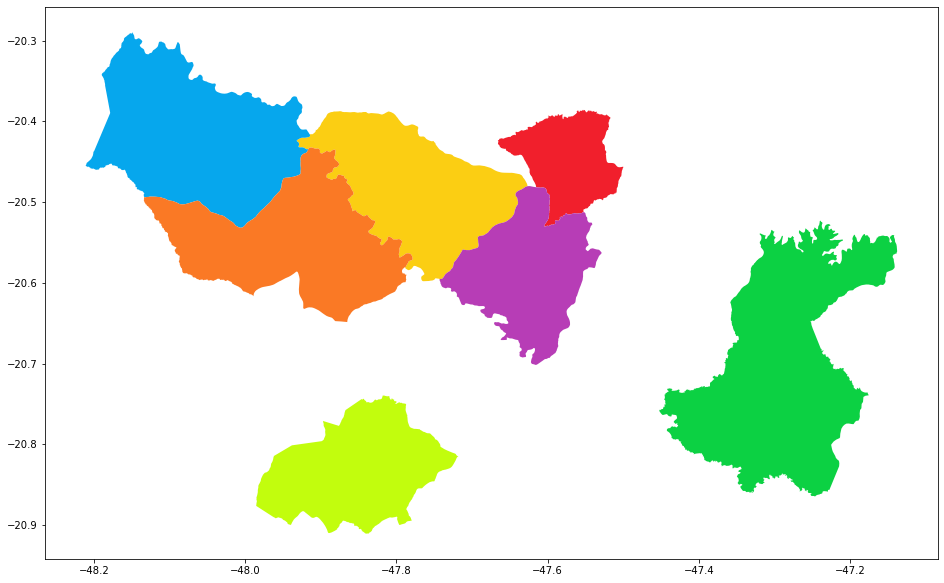

In [16]:
data_plot.plot(color=cores, figsize=(16, 12))

C:\Users\Robson\AppData\Local\Temp\ipykernel_7392\3570243204.py:5: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  plt.text(data_plot.geometry.centroid[i].coords[0][0], data_plot.geometry.centroid[i].coords[0][1], estado.NM_MUN[i],
C:\Users\Robson\AppData\Local\Temp\ipykernel_7392\3570243204.py:5: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  plt.text(data_plot.geometry.centroid[i].coords[0][0], data_plot.geometry.centroid[i].coords[0][1], estado.NM_MUN[i],
C:\Users\Robson\AppData\Local\Temp\ipykernel_7392\3570243204.py:5: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  plt.

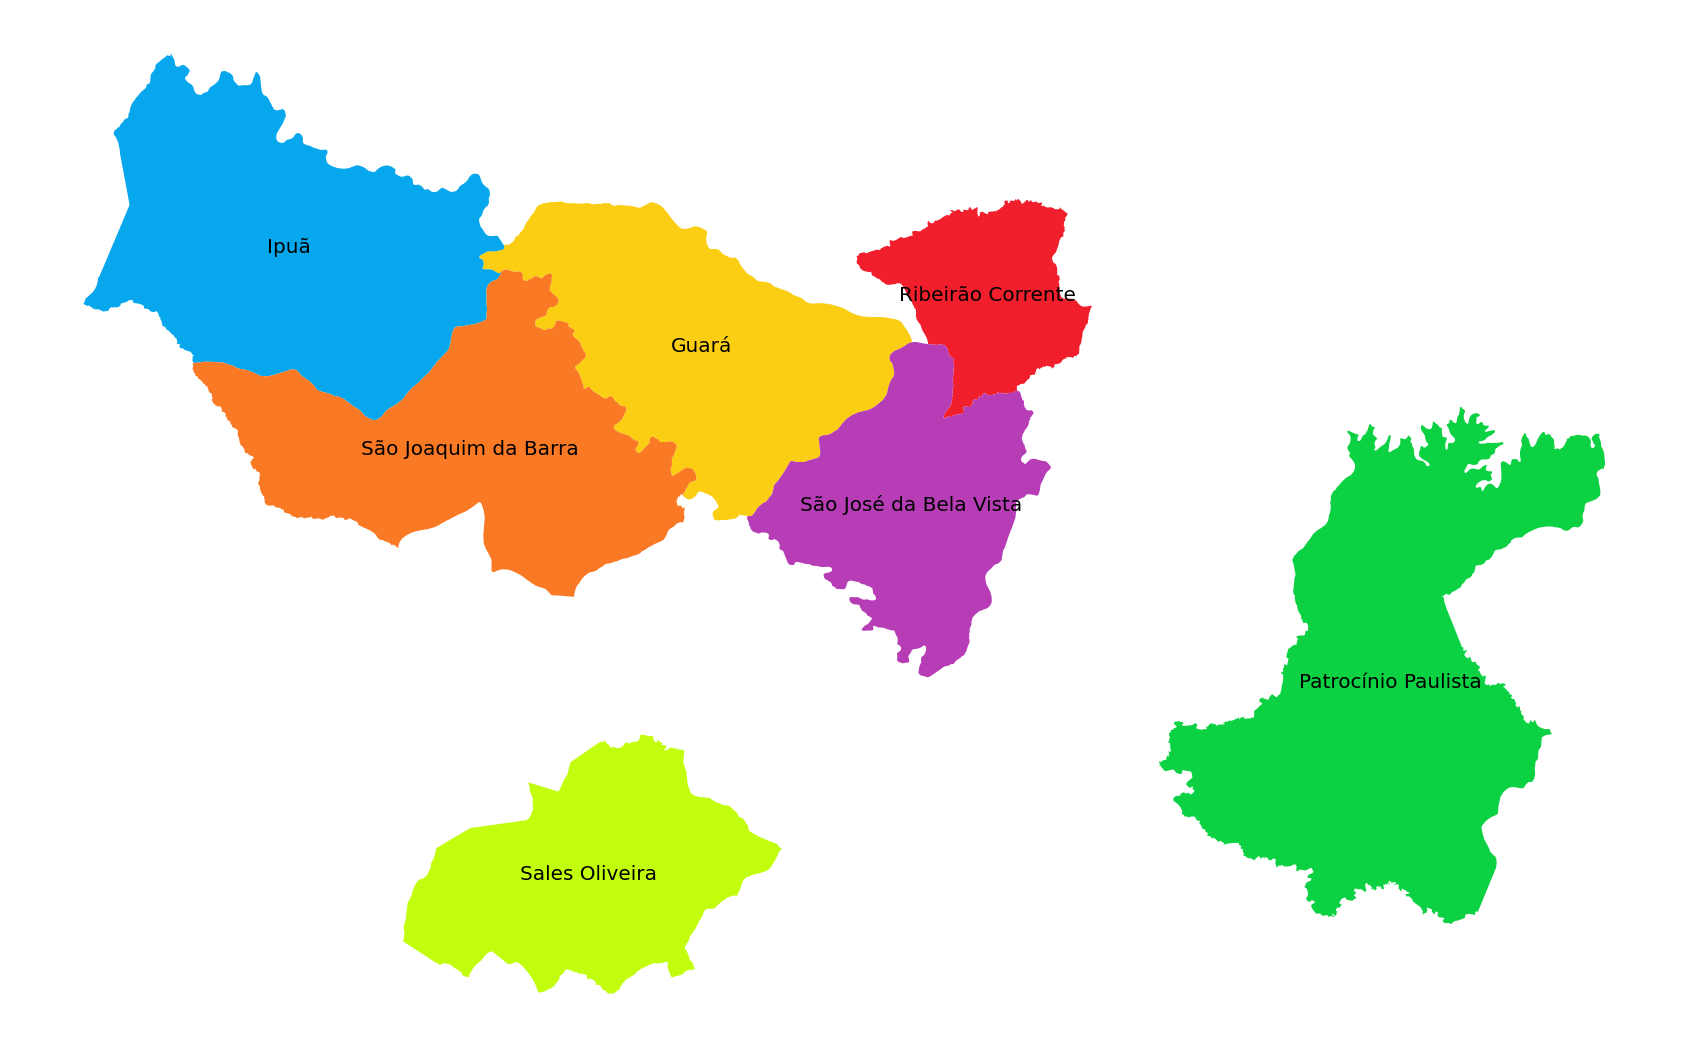

In [17]:
from shapely.geometry import Point
ax = data_plot.plot(color=cores, figsize=(30, 20), legend=True)

for i in data_plot.index:
   plt.text(data_plot.geometry.centroid[i].coords[0][0], data_plot.geometry.centroid[i].coords[0][1], estado.NM_MUN[i],
            fontsize=20, horizontalalignment='center', verticalalignment='center')
    
ax.set_axis_off();    

In [18]:
from shapely.geometry import Point
s = gpd.GeoSeries([Point(1, 1), Point(2, 2), Point(3, 3)], crs=4326)
s

0    POINT (1.00000 1.00000)
1    POINT (2.00000 2.00000)
2    POINT (3.00000 3.00000)
dtype: geometry

Quando utilizamos dados espaciais, uma boa ideia é explorar os dados utilizando um mapa. Criar um mapa simples de um `GeoDataFrame` é muito fácil: você pode utilizar a função ``.plot()``, que cria um mapa baseado nas geometrias dos dados. Na verdade o geopandas utiliza o matplotlib para criar os mapas.

 - Para usar a função precisamos instalar a biblioteca descartes:  
__utilizando o conda__: conda install -c conda-forge descartes  
__utilizando o pip__: pip install descartes

Vamos testar a função ``.plot()`` e ver como os nosso dados se parecem.

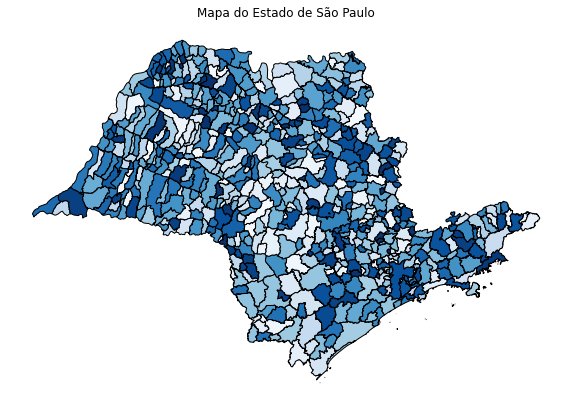

In [19]:
#data.plot(figsize=(10,8), cmap='Blues', facecolor='white', edgecolor='black', legend=True)
#estado.plot(figsize=(16,12), cmap='Blues', facecolor='none', edgecolor='black', legend=True)
estado.plot(figsize=(10,8), cmap='Blues', facecolor='white', edgecolor='black', legend=True)
plt.title('Mapa do Estado de São Paulo')
plt.axis('off')

plt.savefig('imagens/estado-cmm-blue.png', dpi=600, bbox_inches='tight')

(-48.26503481194998, -47.08397007104996, -20.941754762449982, -20.25849714455)

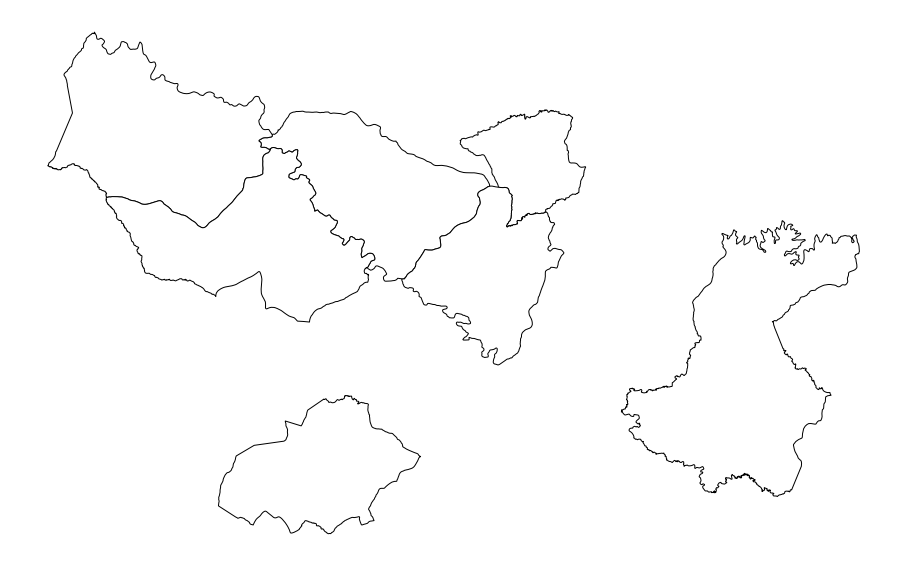

In [20]:
cmm.plot(figsize=(16,12), facecolor='white', edgecolor='black', legend=True)
plt.axis('off')

In [21]:
testadocmm = gpd.overlay(cmm, estado, keep_geom_type=False , how='intersection')

<AxesSubplot:>

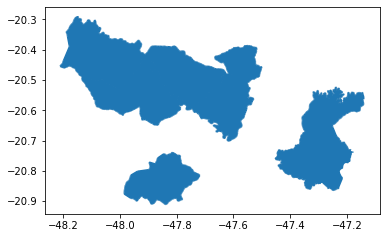

In [22]:
testadocmm.plot()

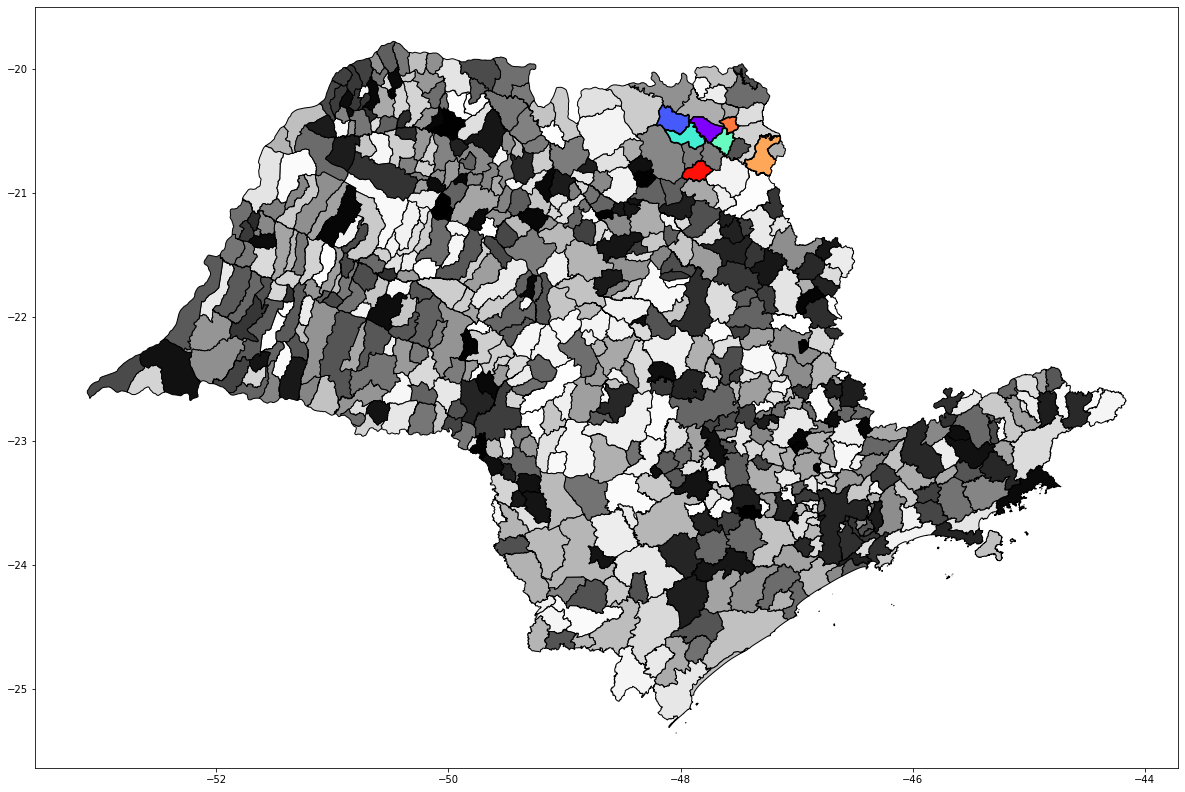

In [23]:
# importar as bibliotecas
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import rtree

# lendo os dados geoespaciais do estado de São Paulo com o geopandas
estado = gpd.read_file('datasets/SP_Municipios_2021.shp')
# Lendo coordenadas da regiao do cmm
cmm = gpd.read_file('datasets/mapa_cmm.shp')

fig, ax = plt.subplots(figsize=(26,14))
estado.plot(ax=ax, cmap='Greys', legend=True, figsize=(16,14), facecolor='white', edgecolor='black')
testadocmm.plot(ax=ax, cmap='rainbow', legend=True, figsize=(16,14), facecolor='green', edgecolor='black')

plt.axis('on')
plt.title('Area do Consórcio de Municípios da Mogiana')

plt.savefig('imagens/estado-cmm.png', dpi=600, bbox_inches='tight')

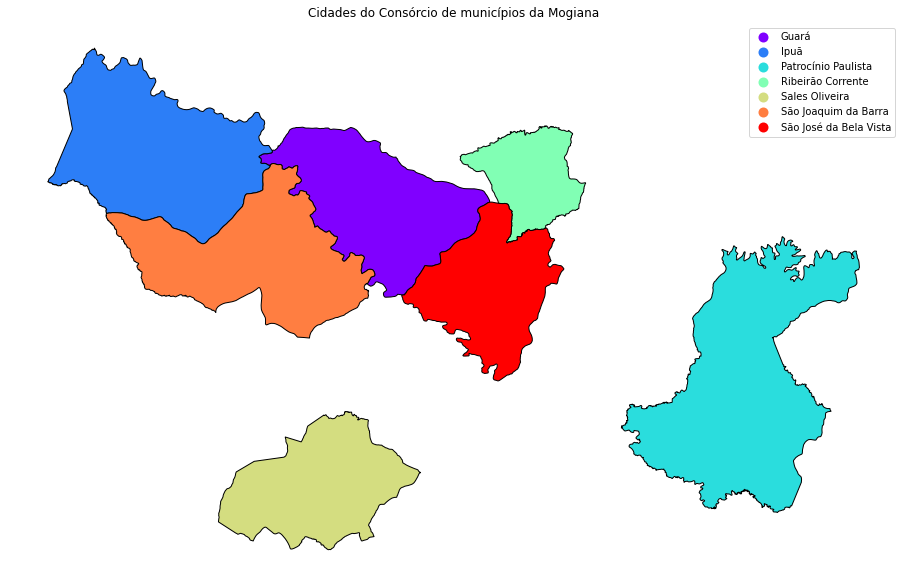

In [24]:
#data.plot(figsize=(16,14), facecolor='white', edgecolor='black')
data_plot.plot(column='NM_MUN', cmap='rainbow', legend=True, figsize=(16,14), facecolor='green', edgecolor='black')
plt.title('Cidades do Consórcio de municípios da Mogiana')
plt.axis('off')

plt.savefig('imagens/municipios-cmm-2.png', dpi=600)

plt.show()

Vamos melhorar a nossa visualização utilizando parâmetros do matplotlib.

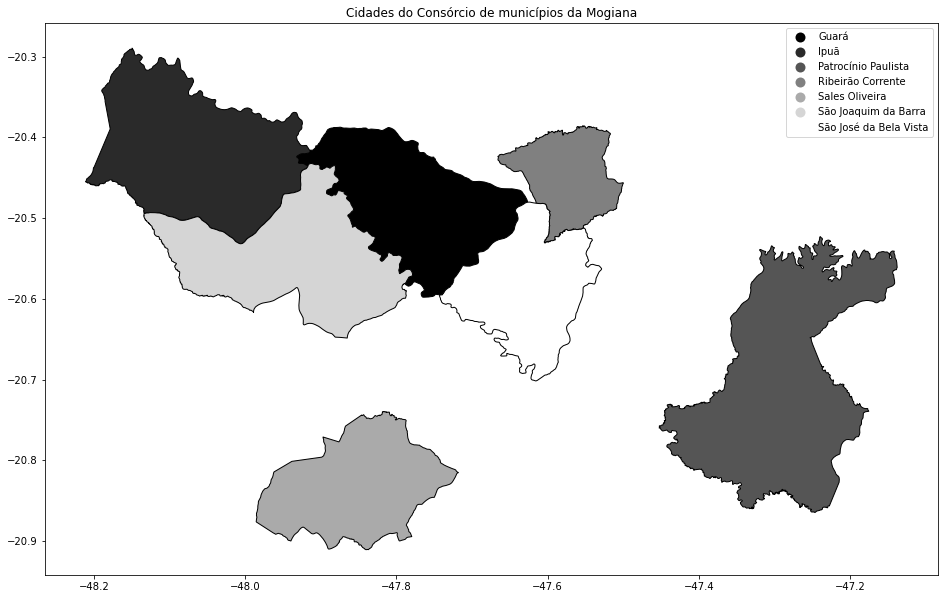

In [25]:
#data.plot(figsize=(16,14), cmap='binary', facecolor='white', edgecolor='black')
cmm.plot(column='NM_MUN', cmap='gist_gray', legend=True, figsize=(16,14), facecolor='white', edgecolor='black')
plt.title('Cidades do Consórcio de municípios da Mogiana')
#plt.axis('off')

plt.savefig('imagens/municipios-cmm.png', dpi=600, bbox_inches='tight')

plt.show()

In [26]:
# vamos filtrar os municípios
cidades = ['Guará', 'Ipuã', 'Patrocínio Paulista', 'Ribeirão Corrente', 'Sales Oliveira', 'São Joaquim da Barra', 'São José da Bela Vista']
cores = ['#FBCE13', '#06A7ED', '#0CD143', '#F11F2C', '#C2FD0D', '#FA7925', '#B73DB6']

matriz = [
    ['Guará', 'Ipuã', 'Patrocínio Paulista', 'Ribeirão Corrente', 'Sales Oliveira', 'São Joaquim da Barra', 'São José da Bela Vista'],
    ['#FBCE13', '#06A7ED', '#0CD143', '#F11F2C', '#C2FD0D', '#FA7925', '#B73DB6']
]

In [27]:
cidades

['Guará',
 'Ipuã',
 'Patrocínio Paulista',
 'Ribeirão Corrente',
 'Sales Oliveira',
 'São Joaquim da Barra',
 'São José da Bela Vista']

In [28]:
cores

['#FBCE13', '#06A7ED', '#0CD143', '#F11F2C', '#C2FD0D', '#FA7925', '#B73DB6']

In [29]:
matriz

[['Guará',
  'Ipuã',
  'Patrocínio Paulista',
  'Ribeirão Corrente',
  'Sales Oliveira',
  'São Joaquim da Barra',
  'São José da Bela Vista'],
 ['#FBCE13', '#06A7ED', '#0CD143', '#F11F2C', '#C2FD0D', '#FA7925', '#B73DB6']]

In [30]:
matriz[1][0]

'#FBCE13'

In [31]:
# salvar o geodataframe com formato geojson
filename = 'datasets/mapa_sjb.json'
cmm.to_file(filename, driver='GeoJSON')

In [32]:
# Lista os indices das cidades
for i in cidades:
    print(i)
    print(cidades.index(i))

Guará
0
Ipuã
1
Patrocínio Paulista
2
Ribeirão Corrente
3
Sales Oliveira
4
São Joaquim da Barra
5
São José da Bela Vista
6


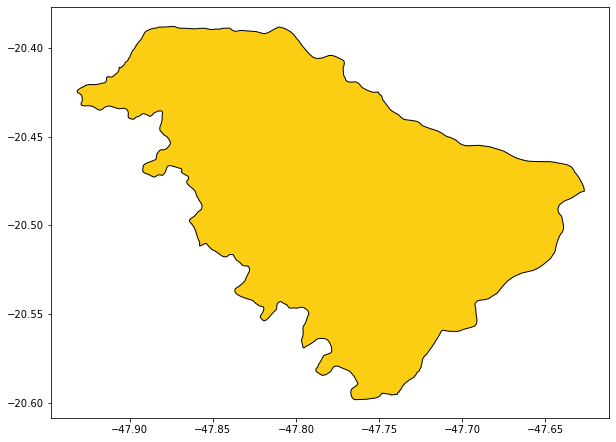

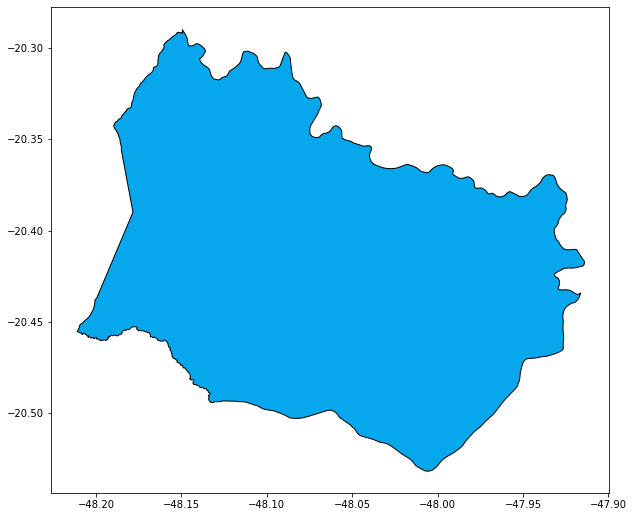

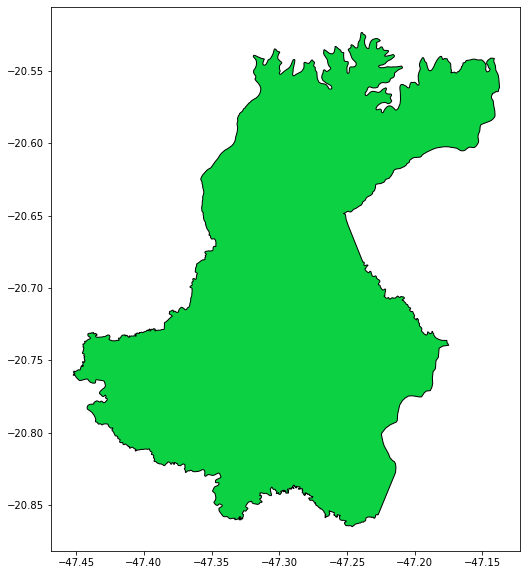

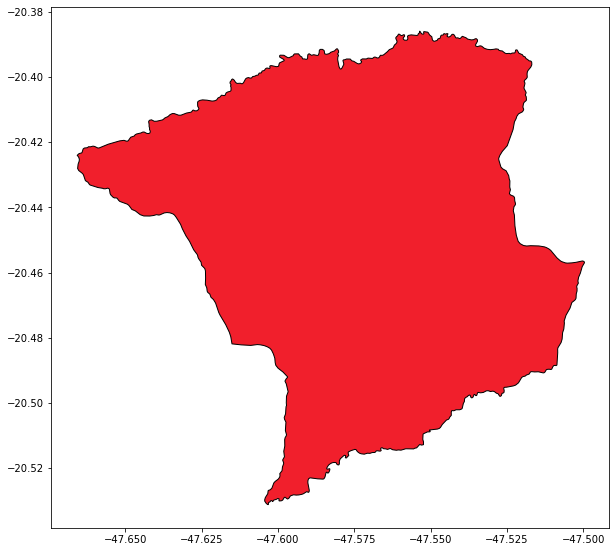

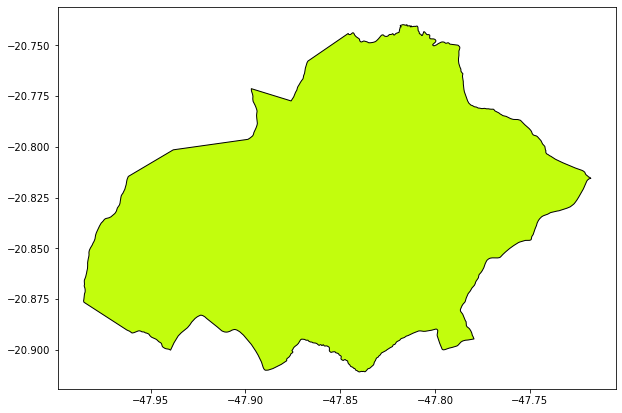

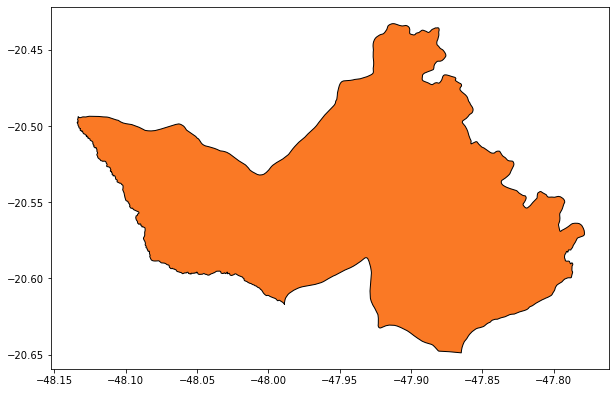

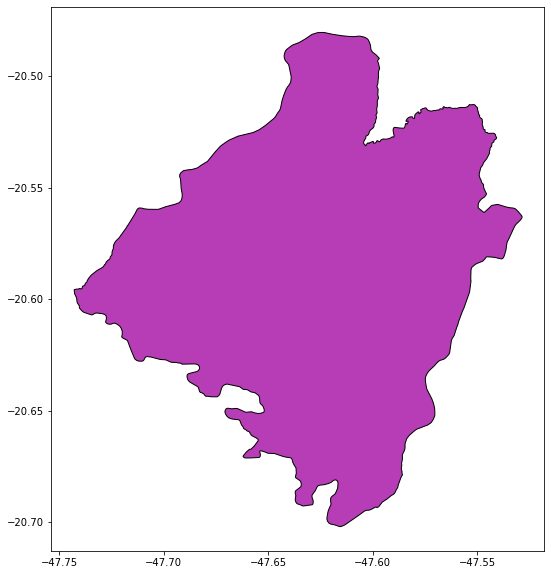

In [33]:
for i in cidades:
    gdf = cmm[cmm['NM_MUN'] == i ]
    # vamos mostrar o município filtrada
    gdf.plot(figsize=(10,10), facecolor='white', edgecolor='black', color=cores[cidades.index(i)], legend=True)
    filename = 'datasets/locais/' + i + '.json'
    gdf.to_file(filename, driver='GeoJSON') 

In [34]:
# salvar o geodataframe com formato geojson
filename = 'datasets/mapas.json'
gdf.to_file(filename, driver='GeoJSON')

Vamos ler o arquivo criado e ver os dados.